In [ ]:
# importation des librairies
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump


In [ ]:
# importation de mon dataset
dataset=pd.read_csv(r"C:\Users\TCHOUPE\Desktop\monprojetdjango\luxeAgence\data\dataset.csv",sep=';')
dataset.head()

,francais,histoire-geo,anglais,mathematique,physique-chimie,SERIE
0,16,14,12,10,1,0
1,14,16,10,4,9,0
2,10,12,14,4,8,0
3,12,12,10,7,9,0
4,11,13,16,2,4,0


In [ ]:
dataset=dataset.rename(columns={'physique-chimie':'physiquechimie','histoire-geo':'histoiregeo'})
dataset.head()

,francais,histoiregeo,anglais,mathematique,physiquechimie,SERIE
0,16,14,12,10,1,0
1,14,16,10,4,9,0
2,10,12,14,4,8,0
3,12,12,10,7,9,0
4,11,13,16,2,4,0


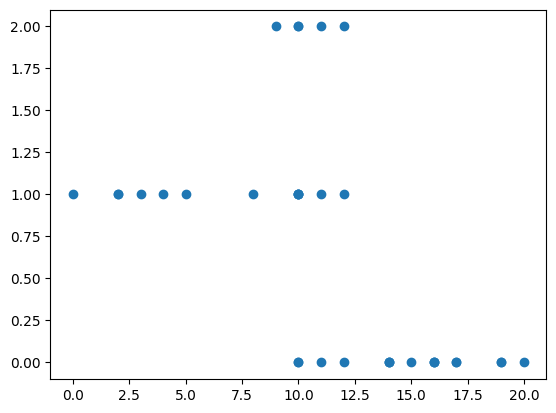

In [ ]:
dataset.shape
plt.scatter(dataset.anglais,dataset.SERIE)


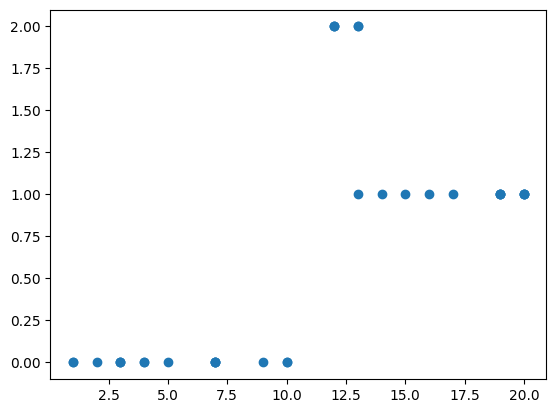

In [ ]:
plt.scatter(dataset.mathematique,dataset.SERIE)

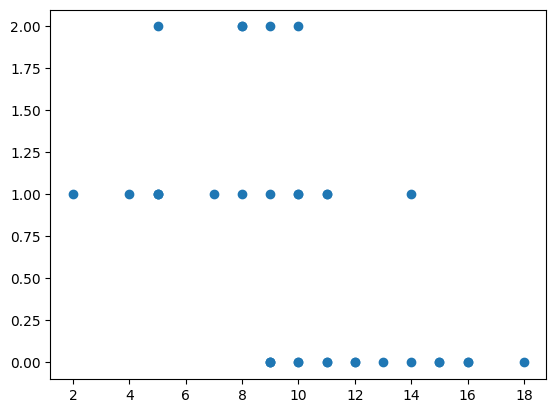

In [ ]:
plt.scatter(dataset.francais,dataset.SERIE)

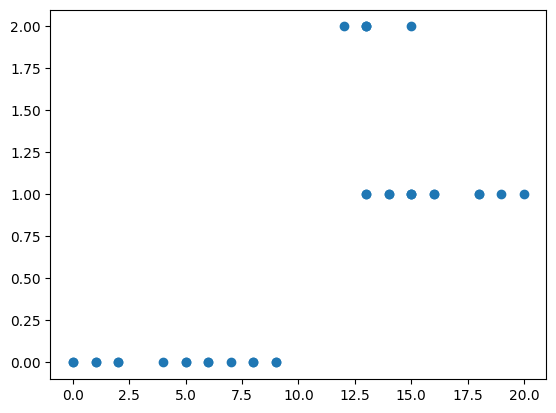

In [ ]:
plt.scatter(dataset.physiquechimie,dataset.SERIE)

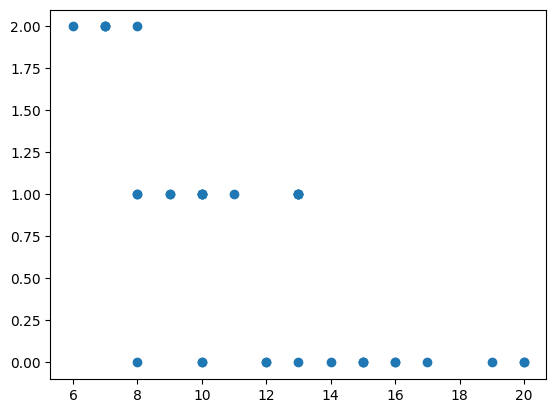

In [ ]:
plt.scatter(dataset.histoiregeo,dataset.SERIE)

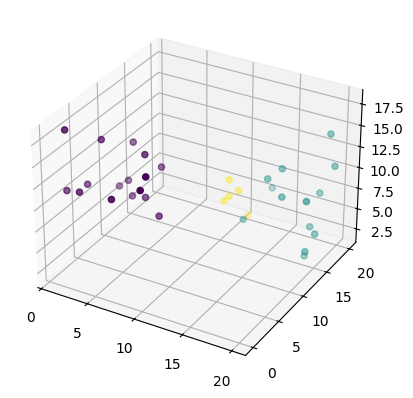

In [ ]:
ax=plt.axes(projection='3d')
ax.scatter(dataset.mathematique,dataset.physiquechimie,dataset.francais,c=dataset.SERIE)

Text(0, 0.5, 'probabilité de faire une serie')

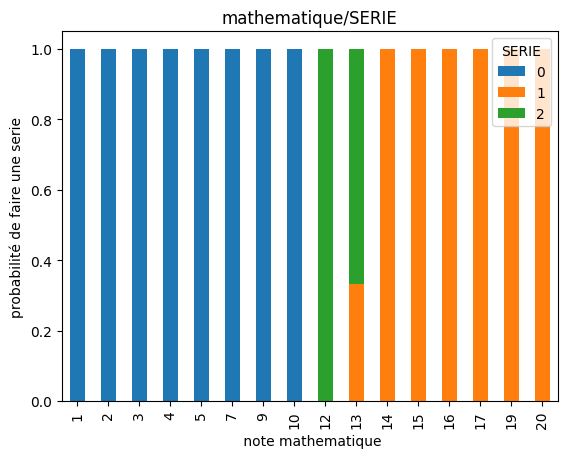

In [ ]:
# l'influence des mathemtique sur la serie c 
table=pd.crosstab(dataset.mathematique,dataset.SERIE)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('mathematique/SERIE')
plt.xlabel(' note mathematique')
plt.ylabel('probabilité de faire une serie')

Text(0, 0.5, 'probabilité de faire une serie')

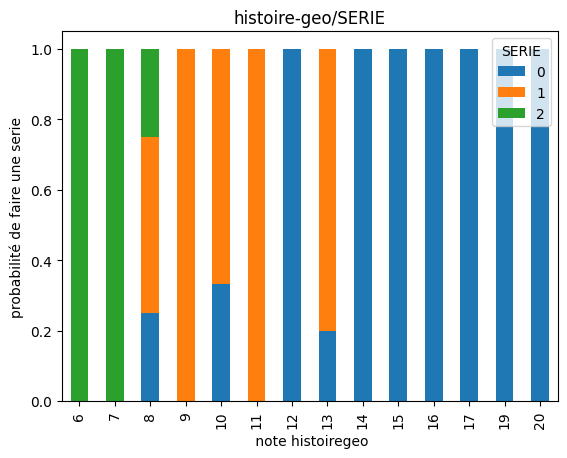

In [ ]:
# l'influence de l'histoiregeo sur le choix    de la serie 
table=pd.crosstab(dataset.histoiregeo,dataset.SERIE)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('histoire-geo/SERIE')
plt.xlabel(' note histoiregeo')
plt.ylabel('probabilité de faire une serie')

Text(0, 0.5, 'probabilité de faire une serie')

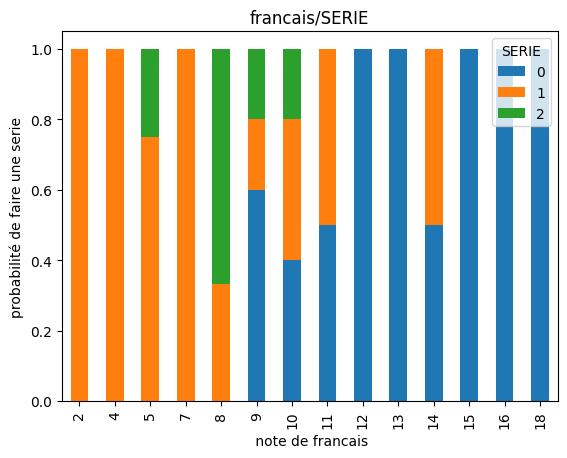

In [ ]:
# influence du francais sur le choix de la serie d'un eleve
table=pd.crosstab(dataset.francais,dataset.SERIE)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('francais/SERIE')
plt.xlabel(' note de francais')
plt.ylabel('probabilité de faire une serie')

In [ ]:
# definir notre variable dependante y et nos variables independant y
x=dataset.iloc[:,[0,1,2,3,4]].values
y=dataset.iloc[:,-1].values
print(x.shape)


(34, 5)


In [ ]:
# division de notre dataset en donner de test et en donner d'entrainemnet 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train)
print(y_train)


(25, 5)
(25,)
(9, 5)
(9,)
[[ 5  7 11 13 15]
 [ 8  6 12 12 12]
 [ 2  9  4 19 15]
 [ 9 20 15  3  8]
 [10 20 14  7  6]
 [15 15 16 10  0]
 [ 4  8  3 20 13]
 [ 9 10 19  5  7]
 [18  8 17  1  2]
 [ 8  7 10 12 13]
 [10  8 10 20 13]
 [14 16 10  4  9]
 [15 16 14  7  6]
 [11 10 17  1  2]
 [ 5  9 10 19 16]
 [11 13 16  2  4]
 [ 7 13  0 14 18]
 [ 9 10  5 17 14]
 [14 13  2 19 20]
 [ 9 19 11  9  5]
 [12 15 16  3  1]
 [10  7  9 12 13]
 [10 10 10 15 15]
 [12 12 10  7  9]
 [16 14 12 10  1]]
[2 2 1 0 0 0 1 0 0 2 1 0 0 0 1 0 1 1 1 0 0 2 1 0 0]


In [ ]:
# creation de mon model de machine learning
logreg=LogisticRegression(
    multi_class="auto",
    max_iter=500
    )
logreg.fit(x_train,y_train)

C:\Users\TCHOUPE\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='auto')

In [ ]:
logreg.score(x_train,y_train)

1.0

In [ ]:
# prediction
y_pred=logreg.predict(x_test)     
y_pred

array([0, 1, 1, 1, 0, 1, 2, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)


1.0

In [ ]:
# sauvegarde de mon modele de machine learning
dump(logreg, 'logreg.joblib') 

['logreg.joblib']